<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/MIAAD_Mate_Pregunta_03_Datos_Academicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 1: Entrada de Datos y Configuración

Para comenzar, importaremos la biblioteca **pandas**, que es ideal para manejar datos en formato de tabla, y **numpy**, para realizar las operaciones vectoriales de manera eficiente.  

Luego, crearemos un **DataFrame** a partir de los datos que se nos proporcionaron de manera aleatoria en el archivo **"datos_academicos.xls"**.


In [1]:
import pandas as pd
import numpy as np

# Datos de la tabla proporcionada
data = {
    'Asignatura': ['Literatura', 'Historia', 'Matemáticas', 'Física', 'Química', 'Sociedad', 'Lenguas extranjeras', 'Matemáticas Aplicadas', 'Proyecto social', 'Desarrollo físico'],
    'Peso': [0.12, 0.08, 0.17, 0.17, 0.10, 0.03, 0.04, 0.04, 0.05, 0.20],
    '202501': [3.5, 8.5, 3.4, 9.8, 7.2, 6.0, 4.0, 6.12, 5.04, 6.94],
    '202502': [4.1, 4.8, 4.5, 8.3, 5.5, 4.45, 4.17, 5.49, 4.34, 7.255],
    '202503': [9.5, 3.2, 6.3, 7.5, 5.3, 6.35, 8.87, 5.73, 5.3, 7.135],
    '202504': [5.8, 3.0, 3.1, 8.4, 5.6, 4.4, 5.52, 5.13, 4.06, 7.435],
    '202505': [7.4, 9.7, 3.3, 8.3, 6.6, 8.55, 7.63, 5.46, 5.74, 7.27],
    '202506': [3.9, 6.2, 8.0, 3.8, 3.5, 5.05, 4.13, 4.59, 4.38, 7.705],
    '202507': [9.7, 7.4, 5.7, 6.0, 4.9, 8.55, 9.47, 4.98, 5.76, 7.51],
    '202508': [5.5, 3.9, 9.6, 10.0, 9.8, 4.7, 5.34, 8.82, 5.8, 5.59],
    '202509': [8.9, 5.9, 9.1, 9.2, 3.7, 7.4, 8.6, 6.6, 6.62, 6.7],
    '202510': [9.1, 6.9, 6.3, 8.8, 5.3, 8.0, 8.88, 6.12, 6.22, 6.94]
}

df_calificaciones = pd.DataFrame(data).set_index('Asignatura')
# Eliminar el nombre del índice para evitar la fila extra
df_calificaciones.index.name = None

print("Tabla de Calificaciones y Pesos de Entrada:")

print ('\n')

# Aplicar estilos
styled_df = df_calificaciones.style.format(precision=4)\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]}
    ])

display(styled_df)

Tabla de Calificaciones y Pesos de Entrada:




,Peso,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510
Literatura,0.1200,3.5000,4.1000,9.5000,5.8000,7.4000,3.9000,9.7000,5.5000,8.9000,9.1000
Historia,0.0800,8.5000,4.8000,3.2000,3.0000,9.7000,6.2000,7.4000,3.9000,5.9000,6.9000
Matemáticas,0.1700,3.4000,4.5000,6.3000,3.1000,3.3000,8.0000,5.7000,9.6000,9.1000,6.3000
Física,0.1700,9.8000,8.3000,7.5000,8.4000,8.3000,3.8000,6.0000,10.0000,9.2000,8.8000
Química,0.1000,7.2000,5.5000,5.3000,5.6000,6.6000,3.5000,4.9000,9.8000,3.7000,5.3000
Sociedad,0.0300,6.0000,4.4500,6.3500,4.4000,8.5500,5.0500,8.5500,4.7000,7.4000,8.0000
Lenguas extranjeras,0.0400,4.0000,4.1700,8.8700,5.5200,7.6300,4.1300,9.4700,5.3400,8.6000,8.8800
Matemáticas Aplicadas,0.0400,6.1200,5.4900,5.7300,5.1300,5.4600,4.5900,4.9800,8.8200,6.6000,6.1200
Proyecto social,0.0500,5.0400,4.3400,5.3000,4.0600,5.7400,4.3800,5.7600,5.8000,6.6200,6.2200
Desarrollo físico,0.2000,6.9400,7.2550,7.1350,7.4350,7.2700,7.7050,7.5100,5.5900,6.7000,6.9400


# **Sección 2: Promedio Ponderado (Pregunta 01)**

Para el promedio ponderado, aplicamos la fórmula del producto punto:

$$P_i = \vec{w}^\top \vec{e}_i$$

Usando `pandas` y `numpy`, esto se traduce en una multiplicación de la matriz de calificaciones (transpuesta) por el vector de pesos.

In [2]:
# Extraer el vector de pesos y la matriz de calificaciones
pesos = df_calificaciones['Peso'].values
calificaciones = df_calificaciones.drop(columns=['Peso'])

# Calcular el promedio ponderado para cada estudiante
promedios_ponderados = np.dot(calificaciones.T, pesos)

# Añadir los resultados al DataFrame original
df_calificaciones.loc['Promedio Ponderado'] = np.insert(promedios_ponderados, 0, np.nan)

print("Tabla con Promedios Ponderados Agregados:")

# Función para aplicar estilo a TODA la fila de promedios (incluyendo Peso con nan)
def resaltar_fila_promedio(fila):
    es_promedio = fila.name == 'Promedio Ponderado'
    estilo = 'background-color: #0072B2; font-weight: bold; color: white;'
    return [estilo if es_promedio else '' for _ in fila]

# Función para resaltar el índice (row heading) de Promedio Ponderado
def resaltar_indice(index):
    return ['background-color: #0072B2; font-weight: bold; color: white;'
            if i == 'Promedio Ponderado' else '' for i in index]

# Aplicar el estilo al DataFrame
styled_df = df_calificaciones.style\
    .apply(resaltar_fila_promedio, axis=1)\
    .apply_index(resaltar_indice, axis=0)

# Alinear todas las celdas al centro y formatear a 4 decimales
styled_df = styled_df.format(precision=4).set_properties(**{'text-align': 'center'})

# Ajustar la alineación del encabezado y la columna de índice
styled_df = styled_df.set_table_styles([
    {'selector': 'th.col_heading', 'props': [('text-align', 'center')]},
    {'selector': 'th.row_heading', 'props': [('text-align', 'left')]}
], overwrite=False)

display(styled_df)

Tabla con Promedios Ponderados Agregados:


,Peso,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510
Literatura,0.1200,3.5000,4.1000,9.5000,5.8000,7.4000,3.9000,9.7000,5.5000,8.9000,9.1000
Historia,0.0800,8.5000,4.8000,3.2000,3.0000,9.7000,6.2000,7.4000,3.9000,5.9000,6.9000
Matemáticas,0.1700,3.4000,4.5000,6.3000,3.1000,3.3000,8.0000,5.7000,9.6000,9.1000,6.3000
Física,0.1700,9.8000,8.3000,7.5000,8.4000,8.3000,3.8000,6.0000,10.0000,9.2000,8.8000
Química,0.1000,7.2000,5.5000,5.3000,5.6000,6.6000,3.5000,4.9000,9.8000,3.7000,5.3000
Sociedad,0.0300,6.0000,4.4500,6.3500,4.4000,8.5500,5.0500,8.5500,4.7000,7.4000,8.0000
Lenguas extranjeras,0.0400,4.0000,4.1700,8.8700,5.5200,7.6300,4.1300,9.4700,5.3400,8.6000,8.8800
Matemáticas Aplicadas,0.0400,6.1200,5.4900,5.7300,5.1300,5.4600,4.5900,4.9800,8.8200,6.6000,6.1200
Proyecto social,0.0500,5.0400,4.3400,5.3000,4.0600,5.7400,4.3800,5.7600,5.8000,6.6200,6.2200
Desarrollo físico,0.2000,6.9400,7.2550,7.1350,7.4350,7.2700,7.7050,7.5100,5.5900,6.7000,6.9400


## **Demostración del Código en Excel** ✅

### **Fórmula utilizada para el Promedio Ponderado**

Para calcular el promedio ponderado en Excel (por ejemplo, para el estudiante **202501**), utilizamos la siguiente fórmula:

```excel
=+$B$2*C$2+$B$3*C$3+$B$4*C$4+$B$5*C$5+$B$6*C$6+$B$7*C$7+$B$8*C$8+$B$9*C$9+$B$10*C$10+$B$11*C$11

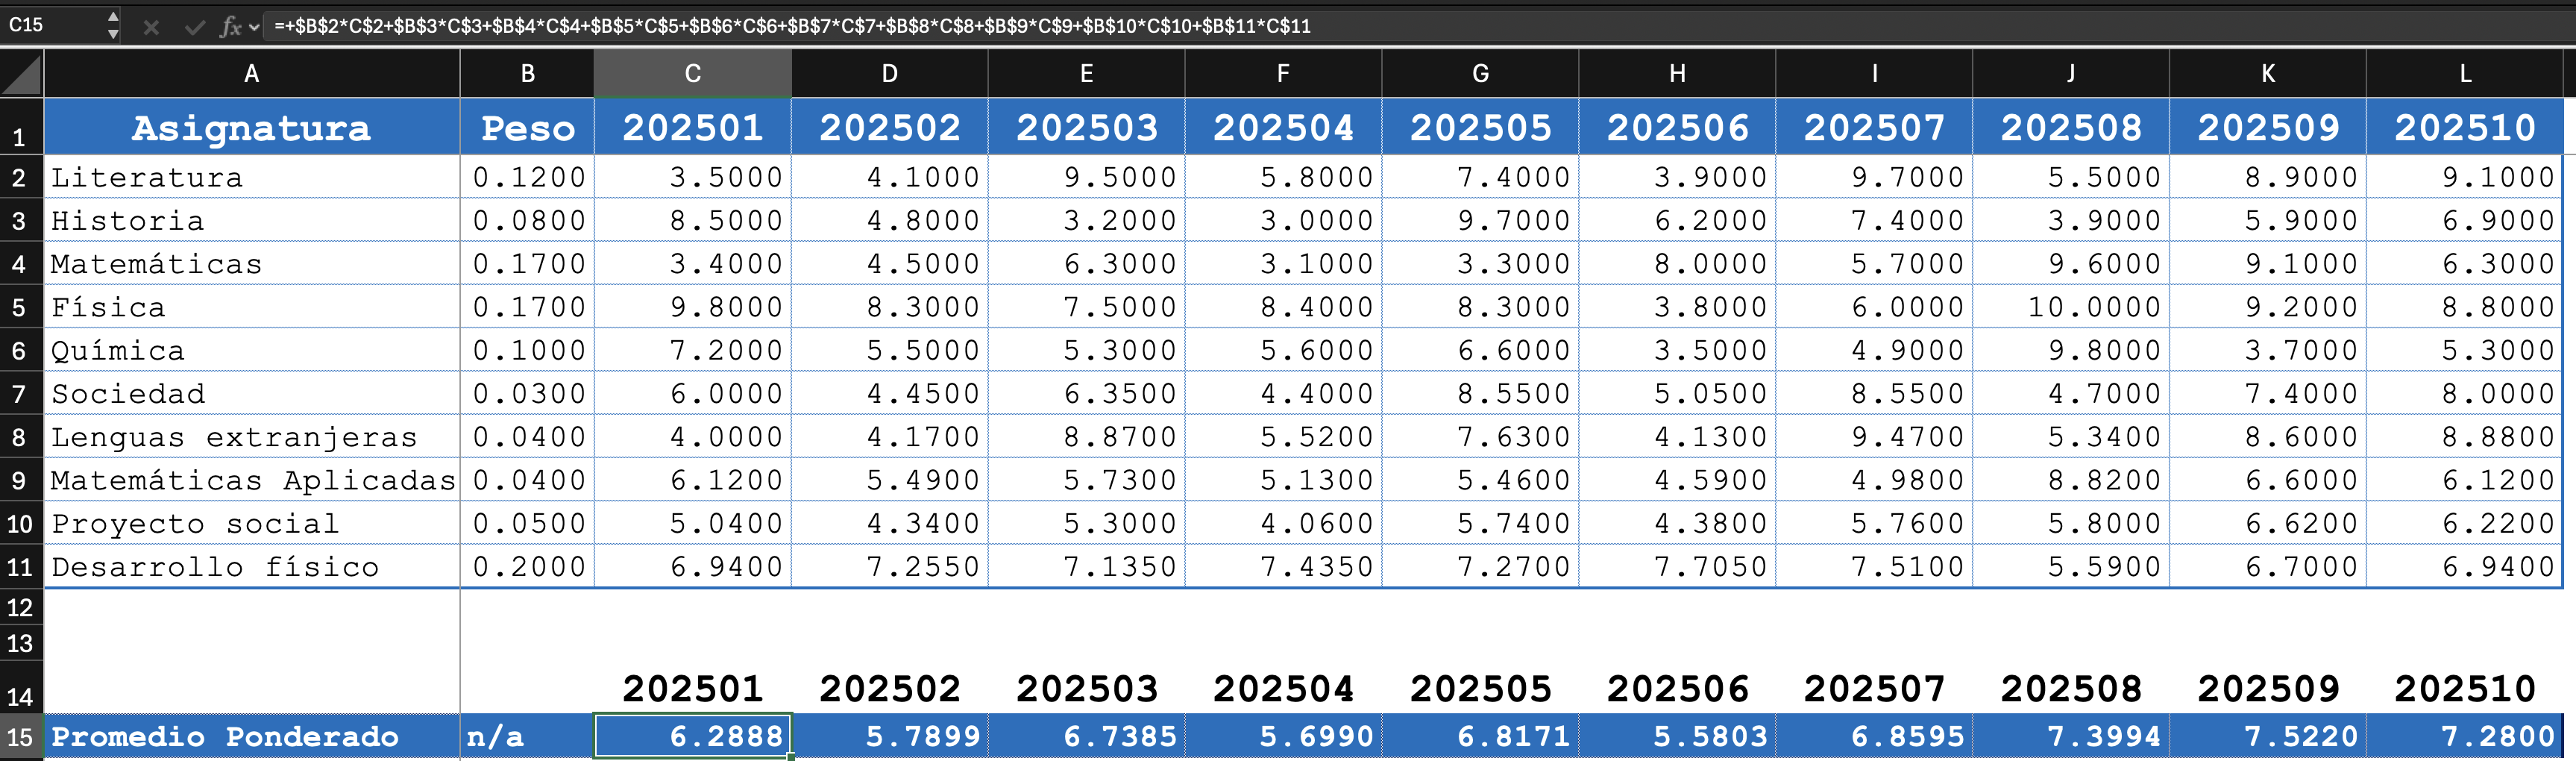

# **Sección 3: Promedio Simple (Pregunta 02)**

Para el promedio simple, cada asignatura tiene el mismo peso. En álgebra lineal, esto equivale a un vector de pesos con entradas de $\frac{1}{m}$, donde $m$ es el número de asignaturas.

$$\vec{w} = \left[\frac{1}{m}, \frac{1}{m}, ..., \frac{1}{m}\right]^\top$$

La operación más directa es simplemente calcular el promedio de cada columna.

In [9]:
# Calcular el promedio simple para cada estudiante
promedios_simples = calificaciones.mean(axis=0)

# Añadir los resultados al DataFrame original
df_calificaciones.loc['Promedio Simple'] = np.insert(promedios_simples.values, 0, np.nan)

print("Tabla con Promedios Simples Agregados:")

# Filtrar el DataFrame para excluir 'Promedio Ponderado' si existe
filas_a_mostrar = df_calificaciones.index != 'Promedio Ponderado'
df_mostrar = df_calificaciones[filas_a_mostrar]

# Función para aplicar estilo a TODA la fila de promedio simple
def resaltar_fila_promedio_simple(fila):
    es_promedio = fila.name == 'Promedio Simple'
    estilo = 'background-color: #FF5722; font-weight: bold; color: white;'
    return [estilo if es_promedio else '' for _ in fila]

# Función para resaltar el índice (row heading) de Promedio Simple
def resaltar_indice_simple(index):
    return ['background-color: #FF5722; font-weight: bold; color: white;'
            if i == 'Promedio Simple' else '' for i in index]

# Aplicar el estilo al DataFrame filtrado
styled_df = df_mostrar.style\
    .apply(resaltar_fila_promedio_simple, axis=1)\
    .apply_index(resaltar_indice_simple, axis=0)

# Alinear todas las celdas al centro y formatear a 4 decimales
styled_df = styled_df.format(precision=4).set_properties(**{'text-align': 'center'})

# Ajustar la alineación del encabezado y la columna de índice
styled_df = styled_df.set_table_styles([
    {'selector': 'th.col_heading', 'props': [('text-align', 'center')]},
    {'selector': 'th.row_heading', 'props': [('text-align', 'left')]}
], overwrite=False)

display(styled_df)

Tabla con Promedios Simples Agregados:


,Peso,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510
Literatura,0.1200,3.5000,4.1000,9.5000,5.8000,7.4000,3.9000,9.7000,5.5000,8.9000,9.1000
Historia,0.0800,8.5000,4.8000,3.2000,3.0000,9.7000,6.2000,7.4000,3.9000,5.9000,6.9000
Matemáticas,0.1700,3.4000,4.5000,6.3000,3.1000,3.3000,8.0000,5.7000,9.6000,9.1000,6.3000
Física,0.1700,9.8000,8.3000,7.5000,8.4000,8.3000,3.8000,6.0000,10.0000,9.2000,8.8000
Química,0.1000,7.2000,5.5000,5.3000,5.6000,6.6000,3.5000,4.9000,9.8000,3.7000,5.3000
Sociedad,0.0300,6.0000,4.4500,6.3500,4.4000,8.5500,5.0500,8.5500,4.7000,7.4000,8.0000
Lenguas extranjeras,0.0400,4.0000,4.1700,8.8700,5.5200,7.6300,4.1300,9.4700,5.3400,8.6000,8.8800
Matemáticas Aplicadas,0.0400,6.1200,5.4900,5.7300,5.1300,5.4600,4.5900,4.9800,8.8200,6.6000,6.1200
Proyecto social,0.0500,5.0400,4.3400,5.3000,4.0600,5.7400,4.3800,5.7600,5.8000,6.6200,6.2200
Desarrollo físico,0.2000,6.9400,7.2550,7.1350,7.4350,7.2700,7.7050,7.5100,5.5900,6.7000,6.9400


### **Demostración del Código en Excel** ✅

**Fórmula utilizada (ejemplo para estudiante 202501):**

```excel
=+$B$2*C$2+$B$3*C$3+$B$4*C$4+$B$5*C$5+$B$6*C$6+$B$7*C$7+$B$8*C$8+$B$9*C$9+$B$10*C$10+$B$11*C$11

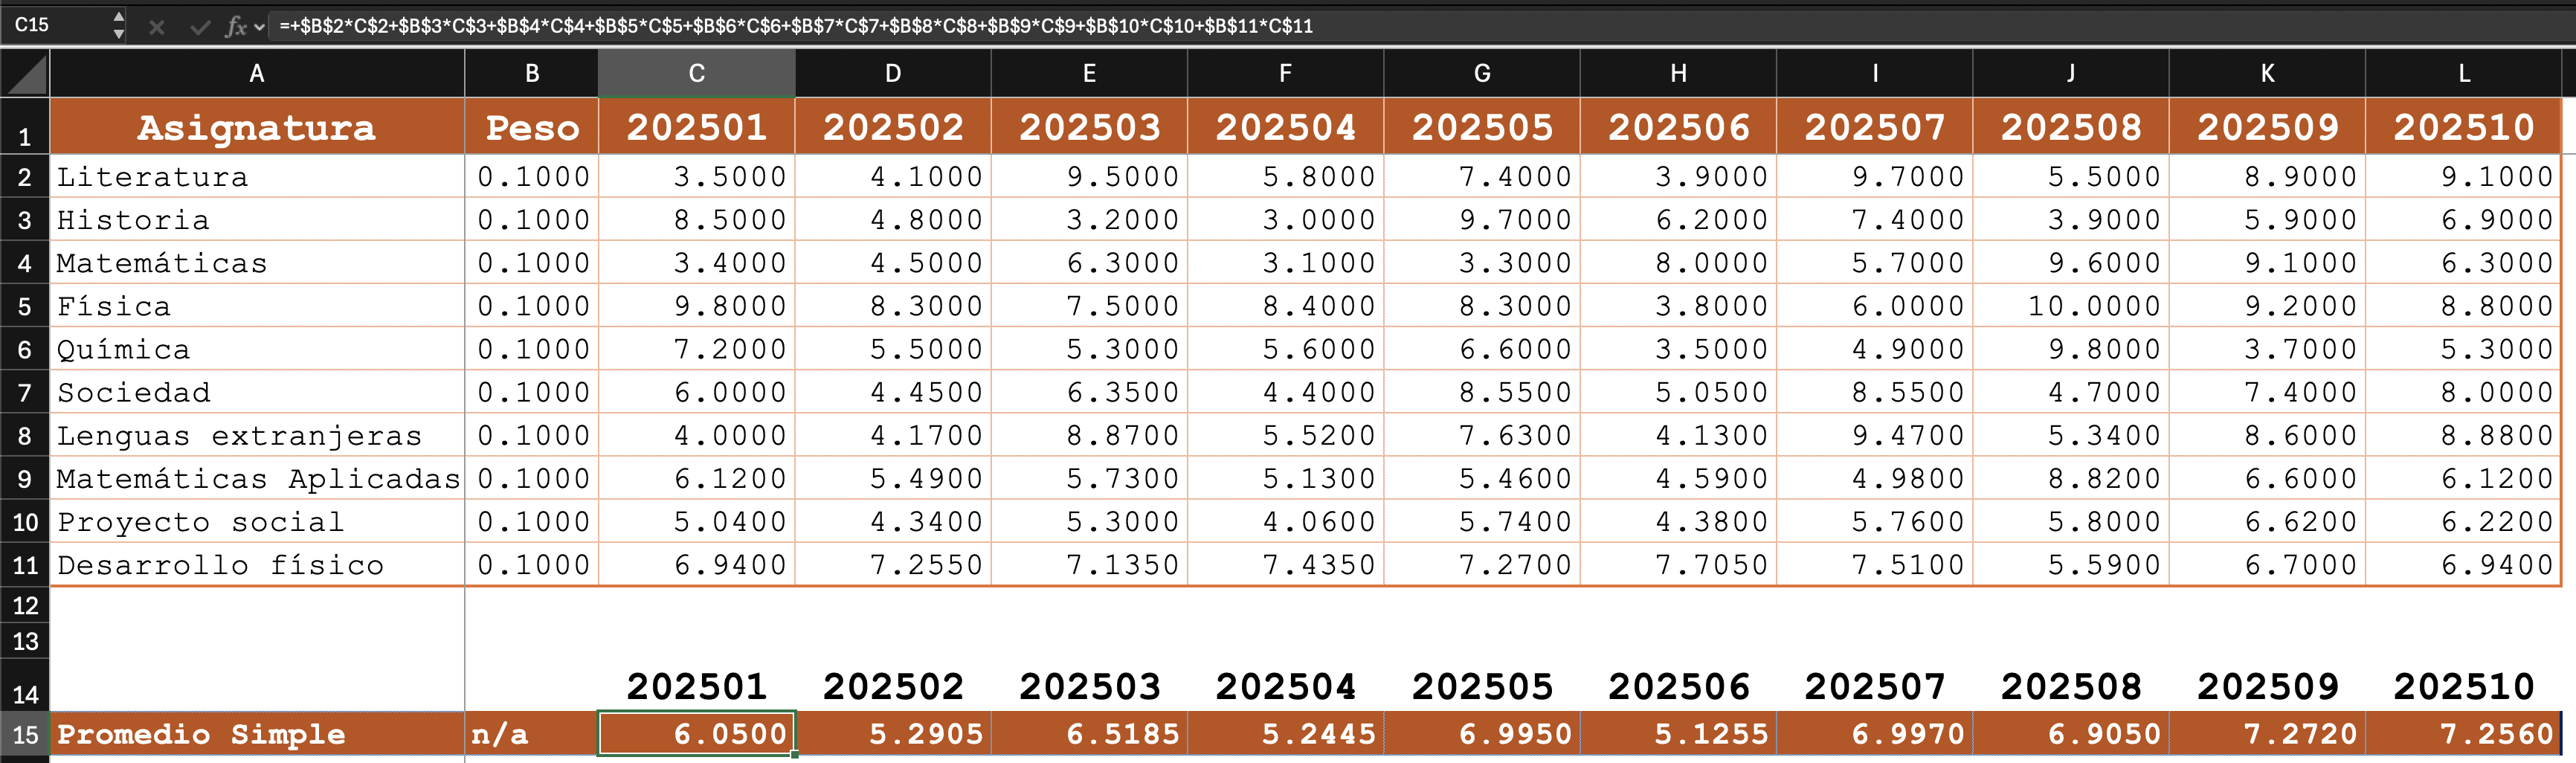

# **Sección 4: Análisis Comparativo de Resultados**

A continuación, compararemos los **promedios simples** y **ponderados** para cada estudiante para entender el impacto de los pesos en la calificación final.

In [12]:
# Mostrar solo la fila de promedios para un análisis comparativo
analisis_df = df_calificaciones.loc[['Promedio Ponderado', 'Promedio Simple'], :]

print("Análisis Comparativo de Promedios:")


print ('\n')


# Función para aplicar estilos diferentes a cada tipo de promedio
def resaltar_filas_promedios(fila):
    if fila.name == 'Promedio Ponderado':
        estilo = 'background-color: #0072B2; font-weight: bold; color: white;'  # Azul
    elif fila.name == 'Promedio Simple':
        estilo = 'background-color: #FF6600; font-weight: bold; color: white;'  # Naranja fuerte
    else:
        estilo = ''
    return [estilo for _ in fila]

# Función para resaltar los índices con colores diferentes
def resaltar_indices_promedios(index):
    estilos = []
    for i in index:
        if i == 'Promedio Ponderado':
            estilos.append('background-color: #0072B2; font-weight: bold; color: white;')  # Azul
        elif i == 'Promedio Simple':
            estilos.append('background-color: #FF6600; font-weight: bold; color: white;')  # Naranja fuerte
        else:
            estilos.append('')
    return estilos

# Aplicar el estilo al DataFrame de análisis
styled_analisis = analisis_df.style\
    .apply(resaltar_filas_promedios, axis=1)\
    .apply_index(resaltar_indices_promedios, axis=0)

# Alinear todas las celdas al centro y formatear a 4 decimales
styled_analisis = styled_analisis.format(precision=4).set_properties(**{'text-align': 'center'})

# Ajustar la alineación del encabezado y la columna de índice
styled_analisis = styled_analisis.set_table_styles([
    {'selector': 'th.col_heading', 'props': [('text-align', 'center')]},
    {'selector': 'th.row_heading', 'props': [('text-align', 'left')]}
], overwrite=False)

display(styled_analisis)

Análisis Comparativo de Promedios:




,Peso,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510
Promedio Ponderado,nan,6.2888,5.7899,6.7385,5.6990,6.8171,5.5803,6.8595,7.3994,7.5220,7.2800
Promedio Simple,nan,6.0500,5.2905,6.5185,5.2445,6.9950,5.1255,6.9970,6.9050,7.2720,7.2560


# **Sección 5: Gráfico de Barras Comparativo**

Esta sección visualiza el impacto de la ponderación en el promedio de cada estudiante mediante un **gráfico de barras**. De un vistazo, puedes comparar el **promedio simple** y el **ponderado** para cada alumno.

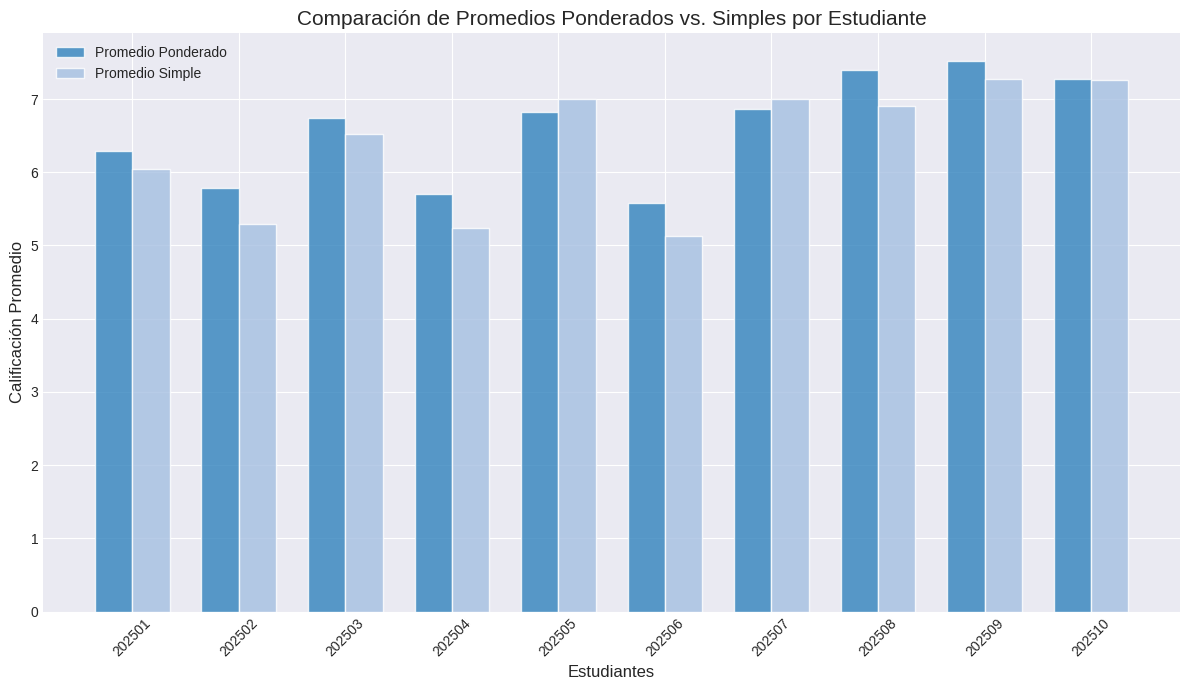

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo del gráfico
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# Extraer los promedios calculados
promedio_ponderado = df_calificaciones.loc['Promedio Ponderado', :].drop(labels=['Peso'])
promedio_simple = df_calificaciones.loc['Promedio Simple', :].drop(labels=['Peso'])
estudiantes = promedio_ponderado.index

# --- Gráfico 1: Comparación de promedios (Barras) ---
plt.figure(figsize=(12, 7))
bar_width = 0.35
index = np.arange(len(estudiantes))

plt.bar(index, promedio_ponderado, bar_width, label='Promedio Ponderado', color='#3182bd', alpha=0.8)
plt.bar(index + bar_width, promedio_simple, bar_width, label='Promedio Simple', color='#a5c0e1', alpha=0.8)

plt.xlabel('Estudiantes', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.title('Comparación de Promedios Ponderados vs. Simples por Estudiante', fontsize=15)
plt.xticks(index + bar_width / 2, estudiantes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# **Sección 6: Diagrama de Dispersión**

Este gráfico de dispersión ofrece un análisis más profundo de la relación entre los promedios. La **línea diagonal roja** sirve como una referencia para identificar qué estudiantes se benefician del sistema de ponderación y cuáles no.

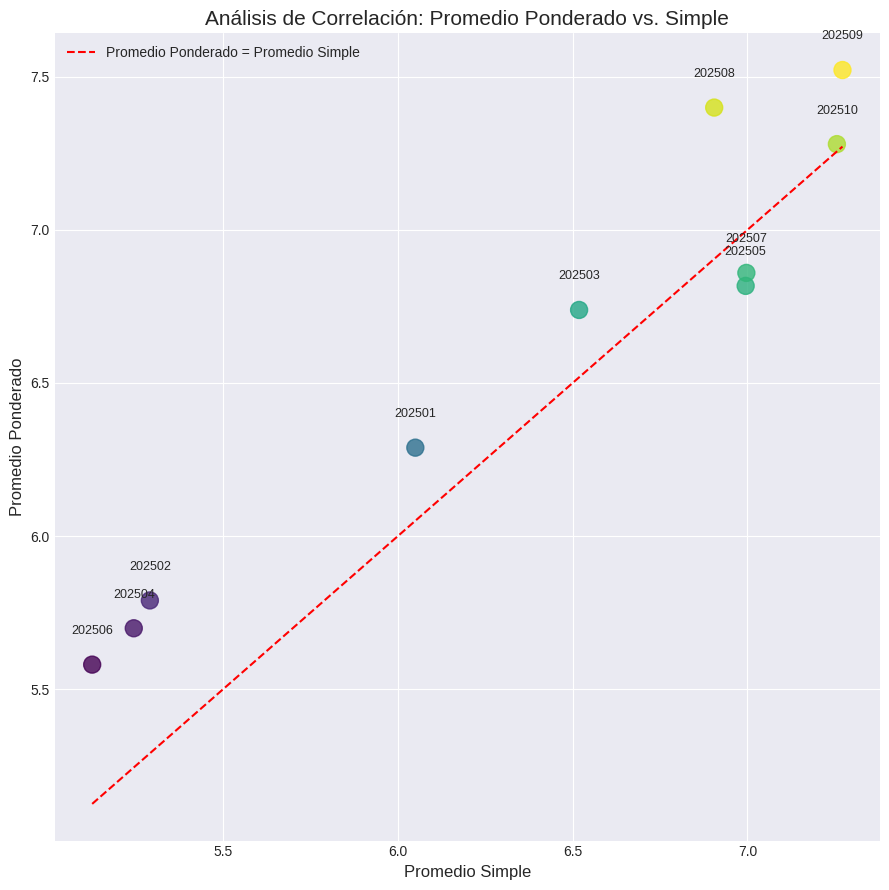

In [6]:
# --- Gráfico 2: Relación entre promedios (Dispersión) ---
plt.figure(figsize=(9, 9))
plt.scatter(promedio_simple, promedio_ponderado, c=promedio_ponderado, cmap='viridis', s=150, alpha=0.8)

# Agregar la línea de referencia y = x
x_vals = np.linspace(min(promedio_simple), max(promedio_simple), 10)
plt.plot(x_vals, x_vals, 'r--', label='Promedio Ponderado = Promedio Simple')

plt.xlabel('Promedio Simple', fontsize=12)
plt.ylabel('Promedio Ponderado', fontsize=12)
plt.title('Análisis de Correlación: Promedio Ponderado vs. Simple', fontsize=15)
plt.legend()

# Anotar los puntos con el ID del estudiante, solucionando la advertencia
for i, student_id in enumerate(estudiantes):
    plt.text(promedio_simple.iloc[i], promedio_ponderado.iloc[i] + 0.1, student_id, fontsize=9, ha='center')

plt.tight_layout()
plt.show()